In [3]:
import chardet
import pandas as pd
import urllib.request

    
#print(encoding_result)
data = pd.read_csv('../../news/scraping_result/en/2018_down2/2018_down2_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/en/2018_down2/2018_down2_Cointelegraph.csv',error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2018_down2/2018_down2_CryptoNews.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2018_down2/2018_down2_Forbes.csv', error_bad_lines=False))


In [4]:
text = data[['main article']]
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [5]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [11]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [16]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [17]:
article_contents = tokenized_doc.values.tolist()

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [19]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [20]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [21]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [22]:
word2id = defaultdict(lambda: 0)

In [23]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [24]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [25]:
len(tf_idf_result)

9140

In [26]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

9140


In [27]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [28]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.000*"salutary" + 0.000*"pitfall" + 0.000*"attachment" + 0.000*"resort" + 0.000*"consignment" + 0.000*"feda" + 0.000*"prologue" + 0.000*"everywhere"')
(1, '0.000*"biboxlab" + 0.000*"suntec" + 0.000*"joshua" + 0.000*"peña" + 0.000*"catalan" + 0.000*"tire" + 0.000*"indispensable" + 0.000*"zaif"')
(2, '0.000*"vays" + 0.000*"toshihiko" + 0.000*"vibrant" + 0.000*"shipper" + 0.000*"bookseller" + 0.000*"correlation" + 0.000*"heta" + 0.000*"dude"')
(3, '0.000*"flagmanship" + 0.000*"cryptotronix" + 0.000*"inverse" + 0.000*"eligibility" + 0.000*"skill" + 0.000*"erosion" + 0.000*"auto" + 0.000*"hypothetical"')


In [29]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

9140

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

9140

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

74.49526086335601

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

6.406238992029412e-05

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

5.019756853901336

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(60)  # 거래소, 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
57,"[0.3293699324131012, 0.3442629873752594, 0.036...",blockchain,0,"[0.04633513, 0.041038323, 0.0097735375, -0.018...",0.000944,0.283152,0.717792,NaN
681,"[0.4001055061817169, 0.3295680582523346, 0.108...",crypto,0,"[0.04633513, 0.041038323, 0.0097735375, -0.018...",0.000185,0.237100,0.763084,NaN
700,"[0.37665778398513794, 0.34193938970565796, 0.0...",company,0,"[0.04633513, 0.041038323, 0.0097735375, -0.018...",0.000166,0.148525,0.851642,NaN
6,"[0.3625454008579254, 0.29229840636253357, 0.09...",exchange,0,"[0.04633513, 0.041038323, 0.0097735375, -0.018...",0.000309,0.142924,0.857385,NaN
342,"[0.40824007987976074, 0.36257341504096985, 0.0...",make,0,"[0.04633513, 0.041038323, 0.0097735375, -0.018...",0.000031,0.124877,0.875154,NaN
488,"[0.3732403516769409, 0.36129632592201233, 0.09...",bank,0,"[0.04633513, 0.041038323, 0.0097735375, -0.018...",0.000602,0.119069,0.881533,NaN
232,"[0.35093215107917786, 0.3059828281402588, 0.06...",token,0,"[0.04633513, 0.041038323, 0.0097735375, -0.018...",0.000255,0.104133,0.896122,NaN
446,"[0.34633442759513855, 0.3412666916847229, 0.04...",technology,0,"[0.04633513, 0.041038323, 0.0097735375, -0.018...",0.000717,0.096666,0.904051,NaN
284,"[0.33865267038345337, 0.3250364661216736, 0.08...",asset,0,"[0.04633513, 0.041038323, 0.0097735375, -0.018...",0.000620,0.095421,0.905199,NaN
551,"[0.4218564033508301, 0.35389527678489685, 0.10...",investor,0,"[0.04633513, 0.041038323, 0.0097735375, -0.018...",0.000117,0.088990,0.911126,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
10,"[0.40760406851768494, 0.3402630388736725, 0.12...",bitcoin,1,"[0.022889385, 0.018108685, 0.0060641705, -0.00...",0.000986,0.335011,0.665975,NaN
34,"[0.45635539293289185, 0.30896881222724915, 0.1...",market,1,"[0.022889385, 0.018108685, 0.0060641705, -0.00...",0.000282,0.215734,0.784547,NaN
2,"[0.41518428921699524, 0.33428800106048584, 0.1...",cryptocurrency,1,"[0.022889385, 0.018108685, 0.0060641705, -0.00...",0.000094,0.165950,0.834144,NaN
5,"[0.4476424753665924, 0.27872470021247864, 0.14...",price,1,"[0.022889385, 0.018108685, 0.0060641705, -0.00...",0.001658,0.136494,0.865164,NaN
79,"[0.41697385907173157, 0.31004607677459717, 0.1...",time,1,"[0.022889385, 0.018108685, 0.0060641705, -0.00...",0.000170,0.128196,0.871974,NaN
8,"[0.4041275382041931, 0.28908881545066833, 0.12...",trade,1,"[0.022889385, 0.018108685, 0.0060641705, -0.00...",0.000242,0.125085,0.875157,NaN
168,"[0.4195293188095093, 0.30507388710975647, 0.11...",year,1,"[0.022889385, 0.018108685, 0.0060641705, -0.00...",0.000249,0.123840,0.876409,NaN
40,"[0.3783862888813019, 0.3164275288581848, 0.093...",cryptocurrencies,1,"[0.022889385, 0.018108685, 0.0060641705, -0.00...",0.000172,0.085464,0.914708,NaN
375,"[0.3727239668369293, 0.32535821199417114, 0.09...",coin,1,"[0.022889385, 0.018108685, 0.0060641705, -0.00...",0.000477,0.073018,0.927460,NaN
245,"[0.41603952646255493, 0.32911255955696106, 0.0...",report,1,"[0.022889385, 0.018108685, 0.0060641705, -0.00...",0.000212,0.065550,0.934662,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 사회적 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
7118,"[0.013818538747727871, 0.01078637596219778, -0...",dumb,2,"[0.0048099156, 0.004174046, 0.0010868999, -0.0...",0.008385,0.000415,1.007970,NaN
6041,"[0.012164286337792873, 0.00739910826086998, 0....",unnecessary,2,"[0.0048099156, 0.004174046, 0.0010868999, -0.0...",0.008623,0.000622,1.008001,NaN
2810,"[0.009758367203176022, 0.015867235139012337, 0...",sandler,2,"[0.0048099156, 0.004174046, 0.0010868999, -0.0...",0.009457,0.001245,1.008212,NaN
4393,"[0.009983547963202, 0.008483177050948143, 0.00...",mainichi,2,"[0.0048099156, 0.004174046, 0.0010868999, -0.0...",0.008846,0.000622,1.008224,NaN
1930,"[0.011975681409239769, 0.009716922417283058, 0...",guard,2,"[0.0048099156, 0.004174046, 0.0010868999, -0.0...",0.009068,0.000415,1.008653,NaN
6159,"[0.019841386005282402, 0.015354229137301445, 0...",seguridad,2,"[0.0048099156, 0.004174046, 0.0010868999, -0.0...",0.009756,0.000207,1.009549,NaN
3630,"[0.009867398999631405, 0.014510087668895721, -...",antonopoulos,2,"[0.0048099156, 0.004174046, 0.0010868999, -0.0...",0.010144,0.000415,1.009729,NaN
7615,"[0.01578117348253727, 0.010016379877924919, 0....",chykhradze,2,"[0.0048099156, 0.004174046, 0.0010868999, -0.0...",0.010210,0.000415,1.009795,NaN
8554,"[0.011205830611288548, 0.007822366431355476, 0...",poster,2,"[0.0048099156, 0.004174046, 0.0010868999, -0.0...",0.011317,0.000415,1.010902,NaN
6702,"[0.013244149275124073, 0.010406054556369781, 0...",magazine,2,"[0.0048099156, 0.004174046, 0.0010868999, -0.0...",0.011327,0.000415,1.010912,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
8628,"[0.0027922189328819513, -0.0011536101810634136...",irrational,3,"[-0.0006266056, -0.0009577781, -1.1794823e-06,...",0.221406,0.000207,1.221199,NaN
4115,"[-0.00021057654521428049, -0.00306839402765035...",endeavour,3,"[-0.0006266056, -0.0009577781, -1.1794823e-06,...",0.307711,0.000207,1.307504,NaN
5144,"[-0.00015626267122570425, -0.00046219606883823...",catapult,3,"[-0.0006266056, -0.0009577781, -1.1794823e-06,...",0.347572,0.000207,1.347364,NaN
6001,"[-0.0021905263420194387, 0.0006399725680239499...",felton,3,"[-0.0006266056, -0.0009577781, -1.1794823e-06,...",0.361224,0.000207,1.361017,NaN
6172,"[-0.0018331868341192603, -0.001882697804830968...",comer,3,"[-0.0006266056, -0.0009577781, -1.1794823e-06,...",0.362838,0.000207,1.362631,NaN
4692,"[-0.00017081839905586094, -0.00095015612896531...",reframing,3,"[-0.0006266056, -0.0009577781, -1.1794823e-06,...",0.404935,0.000207,1.404727,NaN
1355,"[0.000584155903197825, -0.004434745758771896, ...",outcry,3,"[-0.0006266056, -0.0009577781, -1.1794823e-06,...",0.438491,0.000207,1.438284,NaN
225,"[-0.002032187767326832, -0.0062714749947190285...",successive,3,"[-0.0006266056, -0.0009577781, -1.1794823e-06,...",0.450803,0.000207,1.450596,NaN
2766,"[-0.0008475566282868385, -0.003900135634467005...",gutsy,3,"[-0.0006266056, -0.0009577781, -1.1794823e-06,...",0.461426,0.000207,1.461218,NaN
8143,"[0.001063252449966967, 0.0009639168856665492, ...",sidewinder,3,"[-0.0006266056, -0.0009577781, -1.1794823e-06,...",0.471806,0.000207,1.471599,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

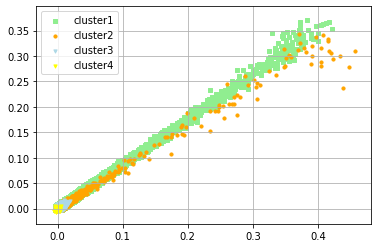

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소,돈

6475

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

1783

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 사회적 이슈

845

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

37

In [62]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 거래소
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 11 # 투자
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 5 # 이슈
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 13 # 기타

In [63]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [65]:
kmeans.inertia_

558.9349536168751

In [66]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 3 3 ... 0 0 0]


In [67]:
cluster_values= list(model.wv.vocab)

In [68]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-558.935


In [69]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [70]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7473296


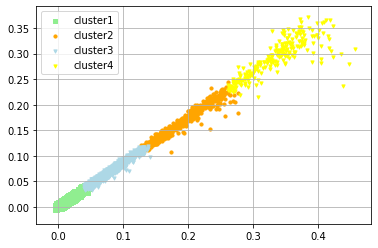

In [71]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [72]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [73]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [74]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [75]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [76]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [77]:
import scipy.spatial.distance as dist

In [78]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [79]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [80]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2136,"[0.014549053274095058, 0.013869558461010456, 0...",enrich,0,"[0.012137273, 0.010670418, 0.0026816083, -0.00...",0.026340,0.000622,1.025718,NaN
846,"[0.012485852465033531, 0.007984093390405178, 0...",pundit,0,"[0.012137273, 0.010670418, 0.0026816083, -0.00...",0.026581,0.000830,1.025751,NaN
6828,"[0.012491771951317787, 0.013519820757210255, 0...",byung,0,"[0.012137273, 0.010670418, 0.0026816083, -0.00...",0.026373,0.000415,1.025958,NaN
2707,"[0.015868335962295532, 0.015122046694159508, 0...",encompass,0,"[0.012137273, 0.010670418, 0.0026816083, -0.00...",0.026624,0.000622,1.026002,NaN
150,"[0.008270670659840107, 0.011608258821070194, -...",subtract,0,"[0.012137273, 0.010670418, 0.0026816083, -0.00...",0.026668,0.000622,1.026045,NaN
1765,"[0.012725099921226501, 0.010154280811548233, -...",recycle,0,"[0.012137273, 0.010670418, 0.0026816083, -0.00...",0.026485,0.000415,1.026070,NaN
6039,"[0.010122536681592464, 0.010734181851148605, 0...",taipei,0,"[0.012137273, 0.010670418, 0.0026816083, -0.00...",0.026573,0.000207,1.026365,NaN
2609,"[0.012181770987808704, 0.015380271710455418, -...",suck,0,"[0.012137273, 0.010670418, 0.0026816083, -0.00...",0.027071,0.000622,1.026449,NaN
5814,"[0.01552359014749527, 0.008765927515923977, 0....",permissive,0,"[0.012137273, 0.010670418, 0.0026816083, -0.00...",0.027211,0.000622,1.026589,NaN
8100,"[0.01622762903571129, 0.008514555171132088, 0....",afghanistan,0,"[0.012137273, 0.010670418, 0.0026816083, -0.00...",0.026899,0.000207,1.026691,NaN


In [81]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
672,"[0.18568895757198334, 0.16465425491333008, 0.0...",method,1,"[0.19019437, 0.16579679, 0.041011285, -0.07434...",0.029544,0.010994,1.018549,NaN
324,"[0.1955558806657791, 0.1672459840774536, 0.041...",iran,1,"[0.19019437, 0.16579679, 0.041011285, -0.07434...",0.029032,0.008920,1.020113,NaN
424,"[0.19258572161197662, 0.17031440138816833, 0.0...",present,1,"[0.19019437, 0.16579679, 0.041011285, -0.07434...",0.032848,0.011616,1.021232,NaN
1611,"[0.18525873124599457, 0.1649779975414276, 0.03...",scheme,1,"[0.19019437, 0.16579679, 0.041011285, -0.07434...",0.031415,0.009542,1.021873,NaN
2237,"[0.18834060430526733, 0.16264264285564423, 0.0...",main,1,"[0.19019437, 0.16579679, 0.041011285, -0.07434...",0.033576,0.011616,1.021960,NaN
220,"[0.1950197070837021, 0.1641126573085785, 0.047...",wide,1,"[0.19019437, 0.16579679, 0.041011285, -0.07434...",0.035061,0.013069,1.021992,NaN
564,"[0.1952650099992752, 0.1617276668548584, 0.037...",factor,1,"[0.19019437, 0.16579679, 0.041011285, -0.07434...",0.035260,0.011202,1.024059,NaN
430,"[0.1867639273405075, 0.169684037566185, 0.0394...",anyone,1,"[0.19019437, 0.16579679, 0.041011285, -0.07434...",0.039801,0.013691,1.026111,NaN
159,"[0.19716942310333252, 0.15916156768798828, 0.0...",june,1,"[0.19019437, 0.16579679, 0.041011285, -0.07434...",0.040995,0.012654,1.028342,NaN
250,"[0.191555917263031, 0.1626310795545578, 0.0457...",push,1,"[0.19019437, 0.16579679, 0.041011285, -0.07434...",0.040041,0.011202,1.028839,NaN


In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2141,"[0.07566049695014954, 0.06689155101776123, 0.0...",actor,2,"[0.076302156, 0.066810355, 0.016316766, -0.029...",0.027499,0.004149,1.023350,NaN
1612,"[0.0741160437464714, 0.06344854086637497, 0.01...",shop,2,"[0.076302156, 0.066810355, 0.016316766, -0.029...",0.027407,0.003319,1.024088,NaN
1870,"[0.07345261424779892, 0.0679725706577301, 0.02...",excite,2,"[0.076302156, 0.066810355, 0.016316766, -0.029...",0.029773,0.004771,1.025002,NaN
1005,"[0.07152031362056732, 0.0704694613814354, 0.01...",fill,2,"[0.076302156, 0.066810355, 0.016316766, -0.029...",0.028157,0.003112,1.025046,NaN
4012,"[0.07295279204845428, 0.06881926953792572, 0.0...",usdc,2,"[0.076302156, 0.066810355, 0.016316766, -0.029...",0.029339,0.003941,1.025398,NaN
2625,"[0.07330421358346939, 0.06357637047767639, 0.0...",qualify,2,"[0.076302156, 0.066810355, 0.016316766, -0.029...",0.029725,0.004149,1.025576,NaN
975,"[0.08000918477773666, 0.06774795800447464, 0.0...",advocate,2,"[0.076302156, 0.066810355, 0.016316766, -0.029...",0.029448,0.003319,1.026129,NaN
1458,"[0.07396172732114792, 0.0651407539844513, 0.01...",piece,2,"[0.076302156, 0.066810355, 0.016316766, -0.029...",0.029869,0.003526,1.026343,NaN
3494,"[0.0734313502907753, 0.06939514726400375, 0.01...",desire,2,"[0.076302156, 0.066810355, 0.016316766, -0.029...",0.030566,0.003526,1.027040,NaN
1046,"[0.07173878699541092, 0.06860965490341187, 0.0...",redeem,2,"[0.076302156, 0.066810355, 0.016316766, -0.029...",0.030941,0.003734,1.027208,NaN


In [83]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(30,'score') # 기술적 시도 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
525,"[0.34844034910202026, 0.2945798635482788, 0.06...",number,3,"[0.33416325, 0.2906964, 0.07358272, -0.1313762...",0.052596,0.043147,1.009449,NaN
398,"[0.32878488302230835, 0.2971385717391968, 0.06...",community,3,"[0.33416325, 0.2906964, 0.07358272, -0.1313762...",0.050617,0.031116,1.019501,NaN
281,"[0.3254763185977936, 0.2905343472957611, 0.072...",open,3,"[0.33416325, 0.2906964, 0.07358272, -0.1313762...",0.060496,0.037546,1.022950,NaN
279,"[0.3428137004375458, 0.295161634683609, 0.0794...",continue,3,"[0.33416325, 0.2906964, 0.07358272, -0.1313762...",0.067417,0.040035,1.027382,NaN
42,"[0.34029167890548706, 0.29455921053886414, 0.0...",follow,3,"[0.33416325, 0.2906964, 0.07358272, -0.1313762...",0.064928,0.030908,1.034020,NaN
1450,"[0.3332529067993164, 0.2853557765483856, 0.075...",announce,3,"[0.33416325, 0.2906964, 0.07358272, -0.1313762...",0.076299,0.040243,1.036057,NaN
163,"[0.3366110622882843, 0.2841941714286804, 0.079...",show,3,"[0.33416325, 0.2906964, 0.07358272, -0.1313762...",0.078795,0.031530,1.047264,NaN
777,"[0.32849738001823425, 0.29459771513938904, 0.0...",product,3,"[0.33416325, 0.2906964, 0.07358272, -0.1313762...",0.090219,0.038168,1.052051,NaN
238,"[0.3373289108276367, 0.3014674484729767, 0.072...",change,3,"[0.33416325, 0.2906964, 0.07358272, -0.1313762...",0.092650,0.034227,1.058423,NaN
247,"[0.3225891888141632, 0.2900509238243103, 0.067...",stablecoins,3,"[0.33416325, 0.2906964, 0.07358272, -0.1313762...",0.085962,0.026759,1.059202,NaN


In [84]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #인플

7256

In [85]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #사회적 시도

483

In [86]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #기타

1176

In [87]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #기술적 시도

225

In [88]:
temp_cluster_result1['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 7 # 비즈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 13 # 기타
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 9 # 기술시도

In [89]:
temp_cluster_result1['result'] = 2 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 2
temp_cluster_result1['Silhouette'] = 0.7473296
temp_cluster_result['Silhouette'] = 0.7473296

In [90]:
temp_cluster_result1.to_csv("../cluster/en_news/2018_down2/en_news_2018_down2_euclidean.csv")
temp_cluster_result.to_csv("../cluster/en_news/2018_down2/en_news_2018_down2_cosine.csv")

In [112]:
word_vectors = model.wv

In [113]:
vocabs = word_vectors.vocab.keys()

In [114]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [115]:
print(word_vectors.similarity(w1='little',w2='push'))

0.99983215


In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [117]:
xys

array([[ 5.06599694e+00, -1.49779139e-02],
       [ 4.61101012e+00,  6.75038454e-02],
       [ 5.06087444e+00,  1.09822840e-01],
       ...,
       [-3.96569880e-01, -1.87062985e-03],
       [-4.38021891e-01, -2.63230039e-03],
       [-4.77956493e-01, -8.19493441e-04]])

In [118]:
xys[:,0]

array([ 5.06599694,  4.61101012,  5.06087444, ..., -0.39656988,
       -0.43802189, -0.47795649])

In [119]:
xys[:,1]

array([-0.01497791,  0.06750385,  0.10982284, ..., -0.00187063,
       -0.0026323 , -0.00081949])

In [120]:
xs = xys[:,0]
ys = xys[:,1]

In [121]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

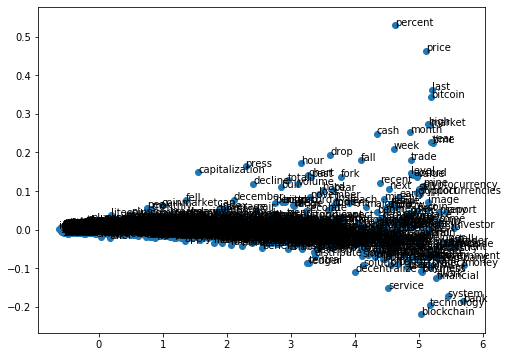

In [122]:
plot_2d_graph(vocabs,xs,ys)

In [123]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>

In [130]:
result_euclidean = temp_cluster_result1.sort_values(['cluster','score'],ascending=[True,False])

In [131]:
result_euclidean.to_csv('./cluster/2018_down2/2018_down2_eucliedean.csv',sep=',')